In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing

In [2]:
import os
import re
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/glovedata/glove.6B.200d.txt
/kaggle/input/glovedata/glove.6B.50d.txt
/kaggle/input/glovedata/glove.6B.100d.txt


In [6]:
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

train_data.head(100)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


In [7]:
train_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [8]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Analysis

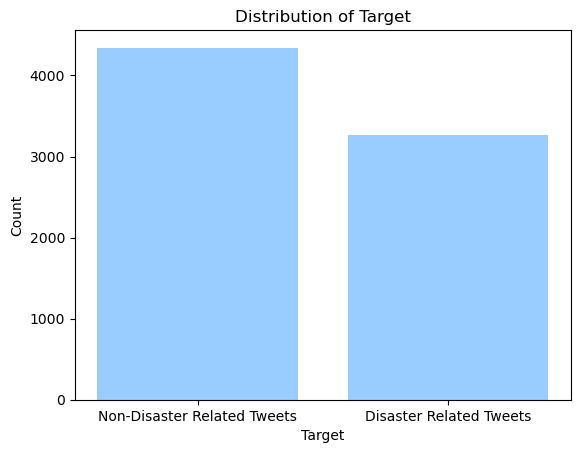

In [10]:
targets = train_data['target'].value_counts()

# Create a bar plot
plt.bar(targets.index, targets.values, color='#99CCFF')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(targets.index, ['Non-Disaster Related Tweets','Disaster Related Tweets'])
plt.title('Distribution of Target')
plt.show()

In [11]:
train_data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


The average number of tokens is: 101.04


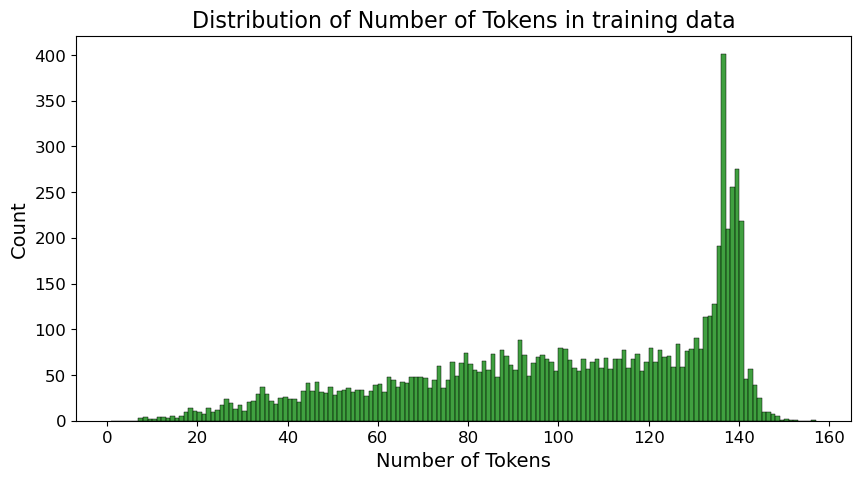

In [12]:
# Histogram of Tweet Lengths
lengths = train_data['text'].apply(len);
plt.figure(figsize=(10, 5))
sns.histplot(lengths, bins=range(1, max(lengths) + 1), edgecolor='black', color='Green')
plt.title('Distribution of Number of Tokens in training data', fontsize=16)
plt.xlabel('Number of Tokens', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
average_length = lengths.mean()
print(f"The average number of tokens is: {average_length:.2f}")

In [13]:
def length(text):
    return len(text)
# new attribute 'length' in train 
train_data['length'] = train_data['text'].apply(length)

In [14]:
train_data.head()
def length(text):
    return len(text)
# new attribute 'length' in train 
train_data['length'] = train_data['text'].apply(length)
train_data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


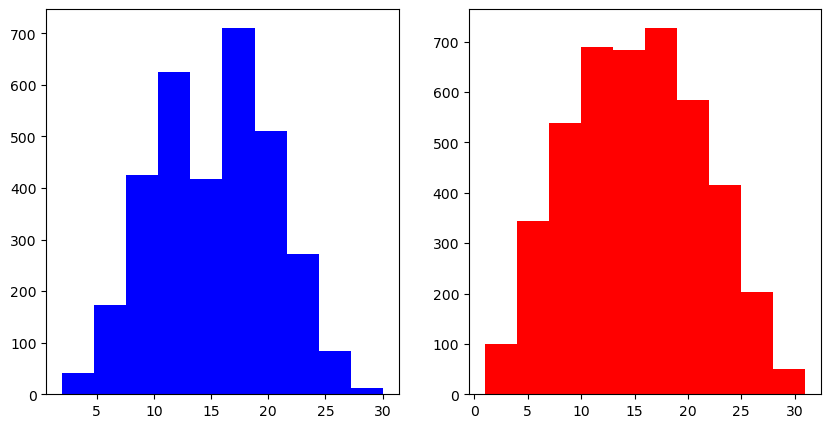

In [15]:
# number of words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = train_data[train_data['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')
tweet_len = train_data[train_data['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='red')
plt.show()

In [16]:
train_data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [17]:
train_data['keyword'] = train_data['keyword'].fillna('')
train_data['location'] = train_data['location'].fillna('')
test_data['keyword'] = test_data['keyword'].fillna('')
test_data['location'] = test_data['location'].fillna('')

In [18]:
train_data.head()

,id,keyword,location,text,target,length
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,,,Forest fire near La Ronge Sask. Canada,1,38
2,5,,,All residents asked to 'shelter in place' are ...,1,133
3,6,,,"13,000 people receive #wildfires evacuation or...",1,65
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,88


In [19]:
train_data['text0'] = train_data['keyword'] + ' ' + train_data['location'] + ' ' + train_data['text']
test_data['text0'] = test_data['keyword'] + ' ' + test_data['location'] + ' ' + test_data['text']

# Remove 'text', 'keyword', and 'location' columns
train_data = train_data.drop(['text', 'keyword', 'location'], axis=1)
test_data = test_data.drop(['text', 'keyword', 'location'], axis=1)

In [20]:
train_data.head(10)

,id,target,length,text0
0,1,1,69,Our Deeds are the Reason of this #earthquake...
1,4,1,38,Forest fire near La Ronge Sask. Canada
2,5,1,133,All residents asked to 'shelter in place' ar...
3,6,1,65,"13,000 people receive #wildfires evacuation ..."
4,7,1,88,Just got sent this photo from Ruby #Alaska a...
5,8,1,110,#RockyFire Update => California Hwy. 20 clos...
6,10,1,95,#flood #disaster Heavy rain causes flash flo...
7,13,1,59,I'm on top of the hill and I can see a fire ...
8,14,1,79,There's an emergency evacuation happening no...
9,15,1,52,I'm afraid that the tornado is coming to our...


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   target  7613 non-null   int64 
 2   length  7613 non-null   int64 
 3   text0   7613 non-null   object
dtypes: int64(3), object(1)
memory usage: 238.0+ KB


## Data Preprocessing

In [22]:
#Data preprocessing

def preprocess_text(text):
    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z0-9\s]","", text)
    # Remove extra spaces
    text = re.sub(r"\s{2,}", " ", text)

    # Convert to lowercase
    text = text.lower()

    # Delete url link
    text = re.sub(r"http\S+|www\S+|https\S+|http", "", text)

    # Removing Mentions and Usernames
    text = re.sub(r"@\w+", "", text)
    
    #tokens = text.split()
    #tokenizer = TreebankWordTokenizer()
    #tokens = tokenizer.tokenize(text)
    # Segmentation using the NLTK library
    tokens = word_tokenize(text)

    # Loading the list of deactivated words
    stop_words = set(stopwords.words("english"))
    #stop_words.add("'m")
    # Remove Discontinued Words
    tokens = [token for token in tokens if token not in stop_words]
    #tokens = [token for token in tokens if token not in tokens]

    processed_text = " ".join(tokens)
    return processed_text


In [23]:
train_data['text0'] = train_data['text0'].apply(preprocess_text)
test_data['text0'] = test_data['text0'].apply(preprocess_text)
train_data.head(10)

,id,target,length,text0
0,1,1,69,deeds reason earthquake may allah forgive us
1,4,1,38,forest fire near la ronge sask canada
2,5,1,133,residents asked shelter place notified officer...
3,6,1,65,13000 people receive wildfires evacuation orde...
4,7,1,88,got sent photo ruby alaska smoke wildfires pou...
5,8,1,110,rockyfire update california hwy 20 closed dire...
6,10,1,95,flood disaster heavy rain causes flash floodin...
7,13,1,59,im top hill see fire woods
8,14,1,79,theres emergency evacuation happening building...
9,15,1,52,im afraid tornado coming area


In [24]:
print(train_data['text0'].iloc[0])

deeds reason earthquake may allah forgive us


In [25]:
# Flatten the list of lists into a single list of words
words = [word for sublist in train_data['text0'].apply(word_tokenize) for word in sublist]

# Count the frequency of each word
word_counts = Counter(words)

# Display the 30 most common words
word_counts.most_common(30)

[('new', 435),
 ('like', 348),
 ('im', 316),
 ('amp', 298),
 ('fire', 290),
 ('usa', 286),
 ('get', 231),
 ('via', 229),
 ('dont', 210),
 ('news', 202),
 ('california', 200),
 ('people', 196),
 ('emergency', 194),
 ('one', 194),
 ('disaster', 188),
 ('us', 185),
 ('police', 178),
 ('2', 166),
 ('video', 165),
 ('ca', 164),
 ('york', 155),
 ('burning', 154),
 ('storm', 153),
 ('crash', 152),
 ('world', 150),
 ('city', 140),
 ('bomb', 138),
 ('attack', 135),
 ('would', 131),
 ('still', 130)]

In [26]:
vocab = set(words)

# 计算词汇表大小
vocab_size = len(vocab)

print(vocab_size)

19558


In [27]:
def generate_wordcloud(text_list):
    tmp = ''
    # iterate through the csv file
    for val in text_list:
    # for val in tmp3:
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        tmp += " ".join(tokens)+" "
    
    wordcloud = WordCloud(max_words=50,width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(tmp)
    return wordcloud

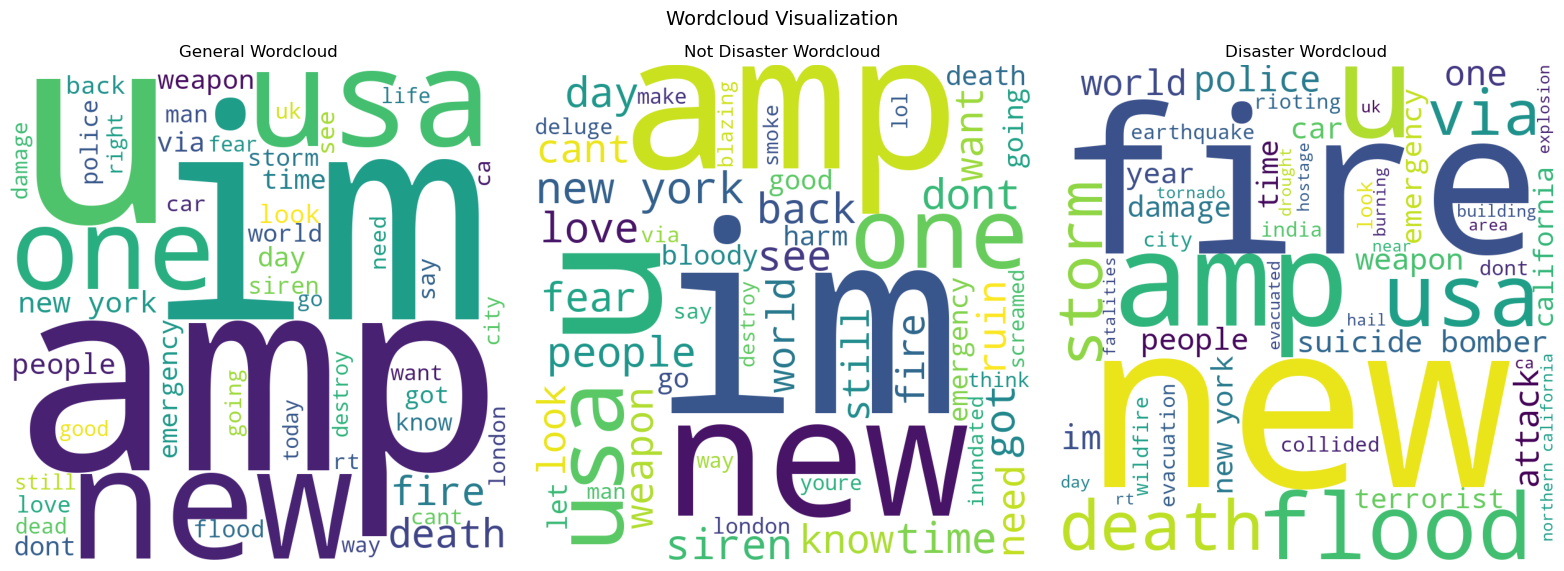

In [28]:
f, ax = plt.subplots(1,3, figsize=(16,8))
f.suptitle('Wordcloud Visualization', y=0.85, fontsize=14)

# general wordcloud
ax[0].set_title('General Wordcloud')
wordcloud = generate_wordcloud(train_data.text0)
ax[0].imshow(wordcloud)
ax[0].axis('off')

# non-disaster wordcloud
ax[1].set_title('Not Disaster Wordcloud')
wordcloud = generate_wordcloud(train_data[train_data.target==0].text0)
ax[1].imshow(wordcloud)
ax[1].axis('off')

# disaster wordcloud
ax[2].set_title('Disaster Wordcloud')
wordcloud = generate_wordcloud(train_data[train_data.target==1].text0)
ax[2].imshow(wordcloud)
ax[2].axis('off')

plt.tight_layout(pad = 2)
plt.show()

In [29]:
custom_stopword = [
    'ca',
    'amp',
    'u',
    'via',
    'rt',
    'im',
    'youre',
]

In [30]:
def stopword_removal(text, stopword_list):
    text = text.split()
    res = [word for word in text if word not in stopword_list]

    return ' '.join(res).strip()

In [31]:
train_data['text0'] = train_data.text0.apply(lambda x: stopword_removal(x, custom_stopword))
test_data['text0'] = test_data.text0.apply(lambda x: stopword_removal(x, custom_stopword))

In [32]:
train_data.head()

,id,target,length,text0
0,1,1,69,deeds reason earthquake may allah forgive us
1,4,1,38,forest fire near la ronge sask canada
2,5,1,133,residents asked shelter place notified officer...
3,6,1,65,13000 people receive wildfires evacuation orde...
4,7,1,88,got sent photo ruby alaska smoke wildfires pou...


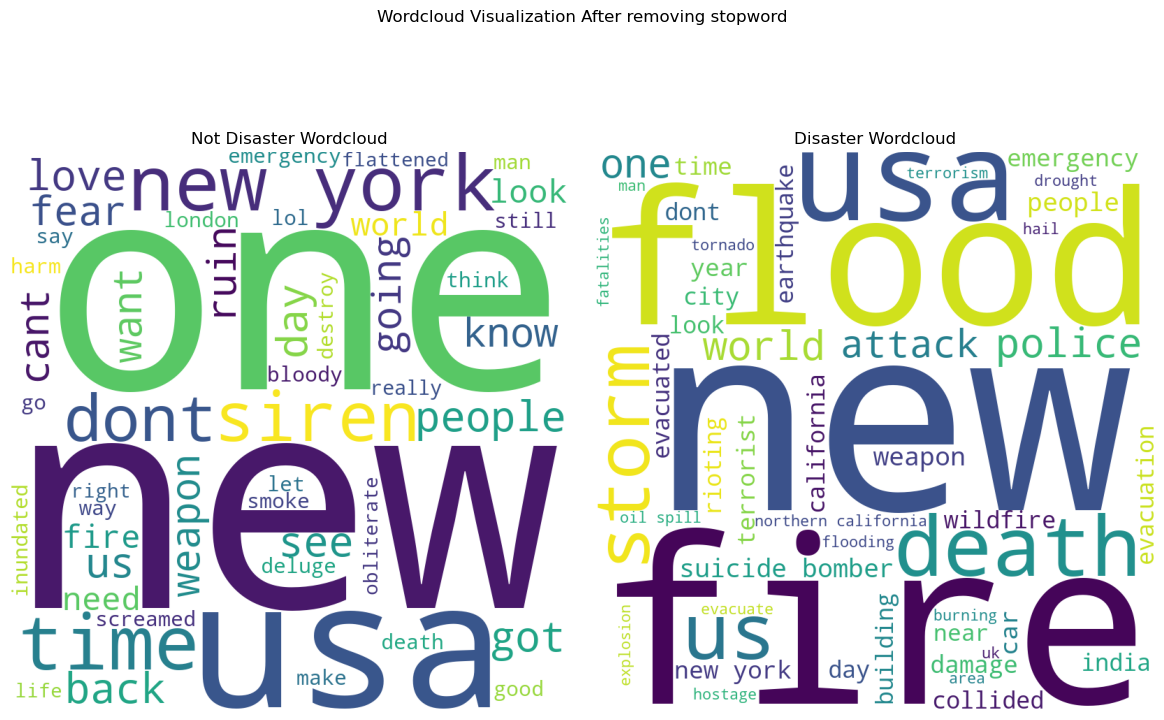

In [33]:
f, ax = plt.subplots(1,2, figsize=(12,10))
f.suptitle('Wordcloud Visualization After removing stopword', y=0.9, fontsize=12)

# non-disaster wordcloud
ax[0].set_title('Not Disaster Wordcloud')
wordcloud = generate_wordcloud(train_data[train_data.target==0].text0)
ax[0].imshow(wordcloud)
ax[0].axis('off')

# disaster wordcloud
ax[1].set_title('Disaster Wordcloud')
wordcloud = generate_wordcloud(train_data[train_data.target==1].text0)
ax[1].imshow(wordcloud)
ax[1].axis('off')

plt.tight_layout(pad = 2)
plt.show()

# Feature Extraction

### TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# learns the vocabulary of the training data (how important a word is)
vectorizer = TfidfVectorizer()
vectorizer.fit(train_data['text0'])

# builds feature vectors for each doc - if a word does not appear, it gets a score of 0.0
tfidf_X = vectorizer.transform(train_data['text0'])

# returns list with each elem as feature learned during fit(), ordered by feature index.
feature_names = vectorizer.get_feature_names_out()

pd.DataFrame(tfidf_X.toarray(), columns=feature_names).iloc[:, :].head(10)

,0000,0011,001116,0025,005225,010156,010217,0104,010401,0106,...,zotar50,zouma,zourryart,zrnf,zss,zuidholland,zumiez,zurich,zxathetis,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Bert

In [35]:
import torch
from transformers import BertModel, BertTokenizer

bert_model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Convert sentences into a format acceptable to BERT
input_ids = [tokenizer.encode(sent, add_special_tokens=True) for sent in train_data['text0']]
max_len   = max([len(i) for i in input_ids])
padded_input_ids  = np.array([i + [0]*(max_len-len(i)) for i in input_ids ])
input_ids_tensor = torch.tensor(padded_input_ids)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [36]:
# Get BERT embeddings
with torch.no_grad():
    Bert_X = bert_model(input_ids_tensor)

KeyboardInterrupt: 

In [ ]:
Bert_X = Bert_X[0][:,0,:].numpy()

### Split Data

In [37]:
tfidf_X

<7613x19524 sparse matrix of type '<class 'numpy.float64'>'
	with 78771 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(tfidf_X, train_data['target'], test_size=.2, stratify=train_data['target'], random_state=1)

X_test = test_data.text0

In [ ]:
# Repeat the process for the BERT model
X_train_BERT, X_test_BERT, y_train_BERT, y_test_BERT = train_test_split(Bert_X, train_data['target'], test_size=.2, random_state=1)


In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_train_BERT.value_counts())
print(y_test_BERT.value_counts())

# Model and Evaluation

### Naive Bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC

In [40]:
parameters = {'alpha': [0.1, 0.5, 1.0, 2.0]}
nb = MultinomialNB()
clf = GridSearchCV(nb, parameters, cv=5,error_score='raise')
clf.fit(X_train, y_train)

print("Best parameters: ", clf.best_params_)

Best parameters:  {'alpha': 0.5}


In [41]:
#NB_train = [str(text) for text in X_train]
NB_model = MultinomialNB(alpha=0.5, fit_prior=True)
NB_model.fit(X_train, y_train)


MultinomialNB(alpha=0.5)

In [62]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve
from matplotlib import pyplot

def evaluate_and_plot(model, X_val, y_val, model_name):
    # predict probabilities
    predicted_labels = model.predict(X_val)
    model_probs = model.predict_proba(X_val)
    # keep probabilities for the positive outcome only
    model_probs = model_probs[:, 1]

    # no skill prediction
    ns_probs = [0 for _ in range(len(y_val))]

    # calculate scores

    ns_auc = roc_auc_score(y_val, ns_probs)
    model_auc = roc_auc_score(y_val ,model_probs)
    model_acc = accuracy_score(y_val, predicted_labels)
    model_f1 = f1_score(y_val, predicted_labels)
    model_precision = precision_score(y_val, predicted_labels)
    model_recall = recall_score(y_val, predicted_labels)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(f'{model_name}: ROC AUC=%.3f' % (model_auc))
    print('Accuracy: ', model_acc)
    print('F1 score: ', model_f1)
    print('Precision: ', model_precision)
    print('Recall: ', model_recall)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_val, model_probs)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(model_fpr, model_tpr, marker='.', label=model_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [ ]:
evaluate_and_plot(NB_model, X_val, y_val, "Naive Bayes")

### Logistic Regression

In [ ]:
LR_model = LogisticRegression(max_iter=150,penalty='l2',solver='liblinear')
LR_model.fit(X_train, y_train)

In [ ]:
evaluate_and_plot(LR_model, X_val, y_val, "Logistic Regression")

### Support Vector Machines

In [ ]:
SVM_model = SVC(C=10, gamma=0.01, kernel='rbf', probability=True)
SVM_model.fit(X_train, y_train)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)  

In [ ]:
evaluate_and_plot(SVM_model, X_val, y_val, "Support Vector Machine")

### CNN

In [ ]:
print(X_train_BERT.shape)
EMBEDDING_DIM = 56
input_length = X_train_BERT.shape[1]
print(input_length)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 256, kernel_size=4, stride=1, padding=1)
#         self.conv2 = nn.Conv1d(256, 128, kernel_size=7, stride=1, padding=1) 
        self.avgpool = nn.AdaptiveMaxPool1d(1)
        self.maxpool = nn.MaxPool1d(kernel_size=2)

        self.fc1 = nn.Linear(256, 32) # This dimension will depend on the output size of the Conv1D and MaxPool1D layer
        self.dropout1 = nn.Dropout(0.4)
#         self.fc2 = nn.Linear(128, 256)
#         self.dropout2 = nn.Dropout(0.6)
#         self.fc3 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1) # to make it (batch_size, 1, seq_length) for conv1d
        x = self.conv1(x)
        x = self.relu(x)
#         x = self.maxpool(x)
#         x = self.conv2(x)
#         x = self.relu(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1) # Flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
#         x = self.relu(x)
#         x = self.dropout2(x)
#         x = self.fc3(x)
#         x = self.relu(x)
#         x = self.fc4(x)
        x = self.sigmoid(x)
#         x = x.squeeze()


        return x

# Initialize the model
CNN = CNNModel()

# If you have a GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CNN = CNN.to(device)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(CNN.parameters(), lr=0.01)

print(CNN)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 256, kernel_size=4, stride=1, padding=1)
        self.avgpool = nn.AdaptiveMaxPool1d(1)
        self.maxpool = nn.MaxPool1d(kernel_size=2)

        # Only one FC layer now
        self.fc1 = nn.Linear(256, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)  # to make it (batch_size, 1, seq_length) for conv1d
        x = self.conv1(x)
        x = self.relu(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.sigmoid(x)

        return x

# Initialize the model
CNN = CNNModel()

# If you have a GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CNN = CNN.to(device)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(CNN.parameters(), lr=0.01)

print(CNN)

In [ ]:
X_train_BERT = X_train_BERT.astype('float32')
y_train_BERT = torch.tensor(y_train_BERT.values)
y_train_BERT = y_train_BERT.float()

X_train_BERT_torch = torch.from_numpy(X_train_BERT).float()

In [ ]:
y_train_BERT_torch = y_train_BERT.unsqueeze(1)  # Adds an extra dimension at index 1

In [ ]:
print(X_train_BERT_torch.shape)
print(y_train_BERT_torch.shape)

In [ ]:
#y_train_BERT = torch.tensor(y_train_BERT.values)
# Training loop
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

batch_size = 3
num_epochs = 30

# Create a DataLoader to handle batching of data
data = torch.utils.data.TensorDataset(X_train_BERT_torch, y_train_BERT)
Bert_data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)


for epoch in range(1):
    correct_predictions = 0
    total_predictions = 0
    for i, (inputs, labels) in enumerate(Bert_data_loader):
        outputs = CNN(inputs)
        #print(outputs)
        outputs=outputs.squeeze(1)
        #print(outputs.shape, labels.shape)
        loss = criterion(outputs, labels)
        predicted_classes = torch.round(torch.sigmoid(outputs))
        correct_predictions += (predicted_classes == labels).sum().item()
        total_predictions += labels.size(0)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:  # Print loss every 100 batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(Bert_data_loader)}], Loss: {loss.item():.4f}')
        
    accuracy = 100 * correct_predictions / total_predictions
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

#     print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 50, loss.item()))

In [ ]:
X_test_BERT = X_test_BERT.astype('float32')
X_test_BERT_torch = torch.from_numpy(X_test_BERT).float()

In [ ]:
# Test the model
CNN.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = CNN(X_test_BERT_torch)
#     _, predicted = torch.max(outputs.data, 1)
    predicted = (outputs.data > 0.5).long()
    total += y_test_BERT.shape[0]
    correct += (predicted == y_test_BERT).sum().item()
    print('Test Accuracy: {} %'.format(100 * correct / total))

## Bert

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

In [ ]:
Bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
Bert_model.train()

In [ ]:
import torch.nn as nn
from transformers import BertTokenizer, BertModel

# 定义BERT分类器模型
class BertForTweetClassification(nn.Module):
    def __init__(self, bert_model_name="bert-base-uncased"):
        super(BertForTweetClassification, self).__init__()
        
        # 加载预训练的BERT模型和分词器
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)
        
        # 全连接层，BERT的隐藏层大小通常是768（对于基本模型），输出是2（真实和非真实）
        self.classifier = nn.Linear(768, 1)
        
    def forward(self, input_ids, attention_mask):
        # 传入BERT模型
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # 获取CLS令牌的输出
        cls_output = outputs[1]
        
        # 传入全连接层
        logits = self.classifier(cls_output)
        
        return logits

# 示例代码
# 创建模型实例
B_model = BertForTweetClassification()

# 示例输入
text = "There is a huge fire in the city center."
tokens = B_model.tokenizer(text, truncation=True, padding=True, return_tensors="pt")
input_ids, attention_mask = tokens["input_ids"], tokens["attention_mask"]
print(input_ids.shape, attention_mask.shape)
print(input_ids, attention_mask)
# 获取模型预测
logits = B_model(input_ids, attention_mask)

print(logits)

In [ ]:
import torch.nn as nn
from transformers import BertModel

class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=True):
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2  # H is hidden layer size. D_out can be modified based on number of labels
        
        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )
        
        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]
        
        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)
        
        return logits

In [ ]:
import torch.nn as nn
from transformers import BertModel, AdamW

class BertClassifier(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased'):
        super(BertClassifier, self).__init__()
        
        # Load the BERT model
        self.bert = BertModel.from_pretrained(bert_model_name)
        
        # Classifier layer
        self.classifier = nn.Linear(self.bert.config.hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        
        # Only take the output from the [CLS] token (similar to sequence_output[:, 0, :] in TensorFlow)
        clf_output = outputs[1]
        
        # Pass through classifier and sigmoid activation
        out = self.sigmoid(self.classifier(clf_output))
        
        return out

# Instantiate the model
model = BertClassifier()

# Loss function
criterion = nn.BCELoss()

# Optimizer (AdamW is a class from the huggingface library as opposed to native PyTorch, which helps with weight decay)
optimizer = AdamW(model.parameters(), lr=1e-5)

print(model)


In [ ]:
new_model = BertForTweetClassification()
new_model = new_model.to(device) # Assuming 'device' is your CUDA device or CPU

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(new_model.parameters(), lr=2e-5)

In [ ]:
B_model = BertForTweetClassification()
B_model = B_model.to(device) # Assuming 'device' is your CUDA device or CPU

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(B_model.parameters(), lr=2e-5)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer.batch_encode_plus(train_data['text0'], padding=True, max_length=512, truncation=True, return_tensors="pt")
b_input_ids = encoded_data['input_ids']
b_attention_mask = encoded_data['attention_mask']
b_target = torch.FloatTensor(train_data['target'])

In [ ]:
import torch.utils.data as Data
test_dataset = Data.TensorDataset(b_input_ids, b_target)
bert_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=2, shuffle=True)

In [ ]:
total_loss = 0
for batch in bert_dataloader:
    pre_input_ids, pre_labels = tuple(t.to(device) for t in batch)
    pre_attention_mask = (pre_input_ids != 0).type(torch.LongTensor).to(device)
    print(pre_input_ids.shape, pre_labels.shape,pre_attention_mask.shape)
    optimizer.zero_grad()
    print(pre_input_ids)
    pre_input_ids = pre_input_ids.long()
    print("Max token ID:", torch.max(pre_input_ids).item())
    print("Min token ID:", torch.min(pre_input_ids).item())
    #logits = B_model(pre_input_ids, attention_mask=pre_attention_mask)
    logits = new_model(pre_input_ids, attention_mask=pre_attention_mask)
    pred = logits.max(1).indices.type(torch.FloatTensor).unsqueeze(1)
    print(logits, pred, pre_labels)
    logits = logits.squeeze(dim=-1) 
    loss = criterion(logits, pre_labels)
    print("loss", loss)
    break

In [ ]:
num_epochs = 3  # Adjust as needed.

B_model.train() # Set model to training mode.
loss_func = nn.CrossEntropyLoss()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in bert_dataloader:
        # Load batch to GPU
        
        pre_input_ids, pre_labels = tuple(t.to(device) for t in batch)
        
        pre_attention_mask = (pre_input_ids != 0).type(torch.LongTensor).to(device)
        # Zero out any previously calculated gradients
        optimizer.zero_grad()
        
        # Perform a forward pass. This will return logits.
#         b_input_ids = b_input_ids.view(1, 512)
        pre_input_ids = pre_input_ids[:, :512]
        pre_input_ids = pre_input_ids.long()
#         b_input_ids = b_input_ids + 5
        #print("Max token ID:", torch.max(pre_input_ids).item())
        #print("Min token ID:", torch.min(pre_input_ids).item())
        logits = B_model(pre_input_ids, attention_mask=pre_attention_mask)
        
        # Compute loss and accumulate the loss values
        #pred = logits.max(1).indices.type(torch.FloatTensor).unsqueeze(1)
        #print("pred:", pred)
        logits = logits.squeeze(dim=-1) 
        loss = criterion(logits, pre_labels)
        print(loss)
        total_loss += loss.item()
        
        # Perform a backward pass to calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
    # Print the average loss over the batch
    avg_train_loss = total_loss / len(Bert_data_loader)
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, avg_train_loss))

## Data augmentation



In [47]:
import random
import nltk
from nltk.corpus import wordnet

In [53]:
def random_swap(sentence, num_swaps=1):
    words = sentence  
    if len(words) < 2:  
        return words
    for _ in range(num_swaps):
        idx1, idx2 = random.sample(range(0, len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return words

In [54]:
augmented_tweets = []
augmented_labels = []

for index, row in train_data.iterrows():
    tweet = row['text0']
    label = row['target']
    
    words = tweet.split()
    
    # 对每个推文执行数据增强
    augmented_words = random_swap(words)
    
    # 将增强后的单词列表转回字符串
    augmented_tweet = ' '.join(augmented_words)
    
    augmented_tweets.append(augmented_tweet)
    augmented_labels.append(label)

In [57]:
augmented_df = pd.DataFrame({
    'text0': augmented_tweets,
    'target': augmented_labels
})

combined_data = pd.concat([train_data, augmented_df], axis=0).reset_index(drop=True)

In [58]:
vectorizer = TfidfVectorizer()
vectorizer.fit(combined_data['text0'])

# builds feature vectors for each doc - if a word does not appear, it gets a score of 0.0
tfidf_X0 = vectorizer.transform(combined_data['text0'])

# returns list with each elem as feature learned during fit(), ordered by feature index.
feature_names0 = vectorizer.get_feature_names_out()

pd.DataFrame(tfidf_X0.toarray(), columns=feature_names0).iloc[:, :].head(10)

,0000,0011,001116,0025,005225,010156,010217,0104,010401,0106,...,zotar50,zouma,zourryart,zrnf,zss,zuidholland,zumiez,zurich,zxathetis,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.model_selection import train_test_split

X_train0, X_val0, y_train0, y_val0 = train_test_split(tfidf_X0, combined_data['target'], test_size=.2, stratify=combined_data['target'], random_state=1)


No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.929
Accuracy:  0.855548260013132
F1 score:  0.8178807947019868
Precision:  0.8925022583559169
Recall:  0.7547746371275783


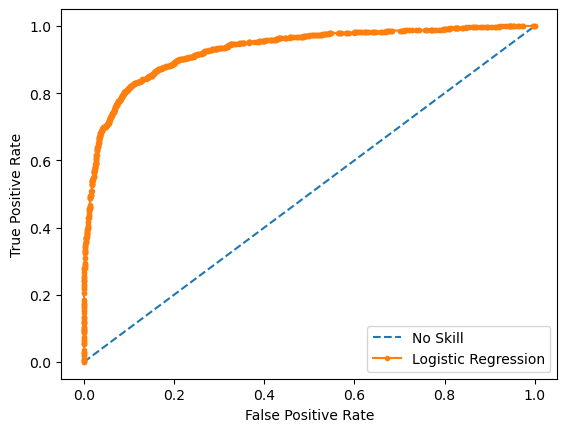

In [64]:
LR_model = LogisticRegression(max_iter=150,penalty='l2',solver='liblinear')
LR_model.fit(X_train0, y_train0)
evaluate_and_plot(LR_model, X_val0, y_val0, "Logistic Regression")

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.913
Accuracy:  0.8076165462902167
F1 score:  0.7304507819687214
Precision:  0.9179190751445087
Recall:  0.6065699006875478


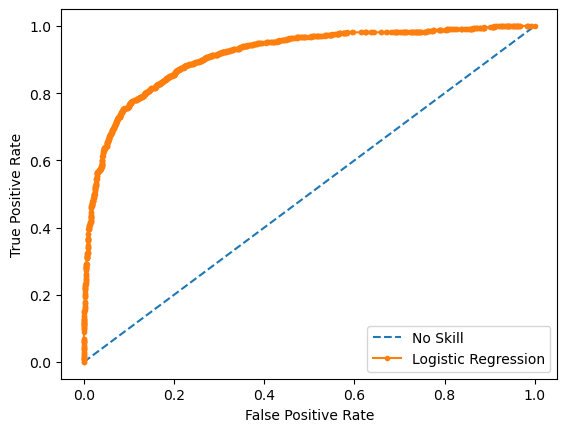

In [65]:
SVM_model = SVC(C=10, gamma=0.01, kernel='rbf', probability=True)
SVM_model.fit(X_train, y_train)
evaluate_and_plot(SVM_model, X_val0, y_val0, "Logistic Regression")

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.952
Accuracy:  0.8903479973736047
F1 score:  0.8652138821630349
Precision:  0.9170230966638152
Recall:  0.8189457601222307


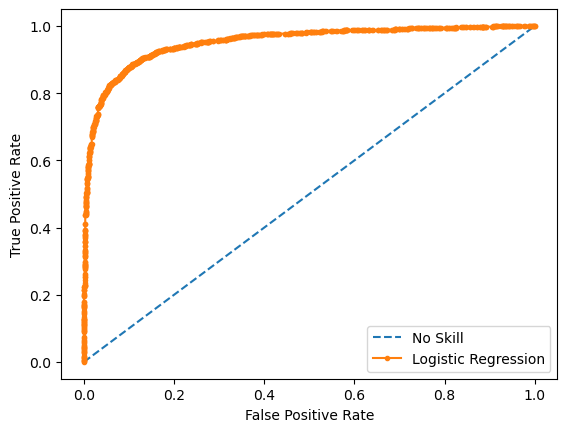

In [66]:
NB_model = MultinomialNB(alpha=0.5, fit_prior=True)
NB_model.fit(X_train, y_train)
evaluate_and_plot(NB_model, X_val0, y_val0, "Logistic Regression")